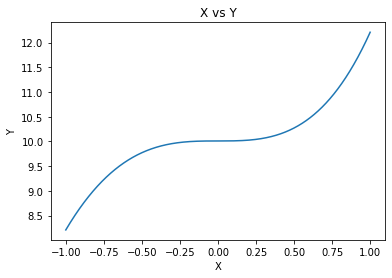

In [38]:
import math
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#Q1: Plotting X vs Y data

X = np.linspace(-1, 1, 30000)
Y = 0.2 * X ** 4 + 2 * X ** 3 +0.1 ** 2 + 10

d = { 'X': X, 'Y': Y}
df = pd.DataFrame(data=d)

data = df.to_numpy()

plot.plot(data[:, 0], data[:, 1])
plot.xlabel('X')
plot.ylabel('Y')
plot.title('X vs Y')
plot.show()

In [14]:
#Q2: Shuffling Data
def data_shuffle(arg, data):
  if(arg == 'shuffle'):
    print("Shuffling Data")
    data = df.sample(frac = 1)
    return data

sh_data = data_shuffle('shuffle', data)
print(sh_data)

Shuffling Data
              X          Y
10941 -0.270576   9.971454
19808  0.320577  10.078004
25653  0.710257  10.777497
10276 -0.314910   9.949508
29380  0.958732  11.941443
...         ...        ...
29233  0.948932  11.881141
6373  -0.575119   9.651426
17398  0.159905  10.018308
4850  -0.676656   9.432296
13533 -0.097770  10.008149

[30000 rows x 2 columns]


In [21]:
#Q3: Data Split Fn
def Data_Split(train, test, validtn, data):
  train = abs(30000 * train)
  validtn = int(abs(30000 * validtn))
  test = abs(30000 * test)
  testRNG = int(train + test)
  training = data.head(int(train))
  testing = data.head(int(test))
  validtn = data.head(int(testRNG + train))
  return training, validtn, testing

training, testing, validation = Data_Split(0.3, 0.2, 0.5, sh_data)

#Q4: Scaling Data
def Scale_Data(train, test, validtn):
  minMaxScaled = train.copy()
  minMaxScaled['X'] = (minMaxScaled['X'] - minMaxScaled['X'].min()) / (minMaxScaled['X'].max() - minMaxScaled['X'].min())
  minMaxScaled['Y'] = (minMaxScaled['Y'] - minMaxScaled['Y'].min()) / (minMaxScaled['Y'].max() - minMaxScaled['Y'].min())

  nTest = test.copy()
  nTest['X'] = (nTest['X'] - nTest['X'].min()) / (nTest['X'].max() - nTest['X'].min())
  nTest['Y'] = (nTest['Y'] - nTest['Y'].min()) / (nTest['Y'].max() - nTest['Y'].min())

  nValidtn = validtn.copy()
  nValidtn['X'] = (nValidtn['X'] - nValidtn['X'].min()) / (nValidtn['X'].max() - nValidtn['X'].min())
  nValidtn['Y'] = (nValidtn['Y'] - nValidtn['Y'].min()) / (nValidtn['Y'].max() - nValidtn['Y'].min())

  return minMaxScaled, nTest, nValidtn

train, test, validtn = Scale_Data(training, validation, testing)

In [23]:
#Q5: MAE, MSE, RMSE, and R2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def errCalc(xTest, yTest, yPred):
  MAE = mean_absolute_error(yTest, yPred)
  MSE = mean_squared_error(yTest, yPred)
  RMSE = math.sqrt(MSE)
  R2 = r2_score(yTest, yPred)
  
  return MAE, MSE, RMSE, R2

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 31.4426
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1189
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0460
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0194
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0069
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0037
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 13/20
750/750 [===

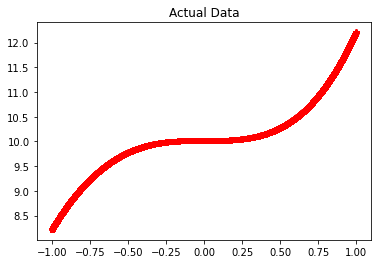

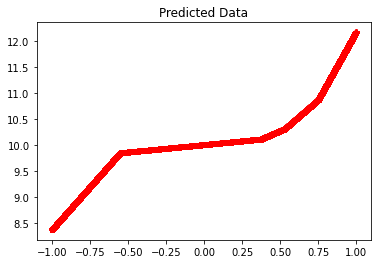

Mae : 0.032181121801490124
MSE : 0.001960803249700268
RMSE : 0.04428095809374802
R2 : 0.9965982957952275


In [25]:
#Q6: CASE 1
xTrain = training['X']
yTrain = training['Y']
xTest = testing['X']
yTest = testing['Y']
xVldtn = validation['X']
yVldtn = validation['Y']

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='linear')
                          ])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 2s 1ms/step - loss: 34.4078
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0870
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0669
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0567
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0523
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0477
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0399
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0291
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0193
Epoch 10/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0125
Epoch 11/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 12/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 13/20
750/750 [===

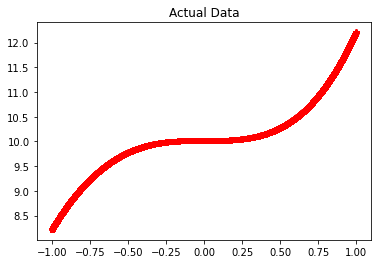

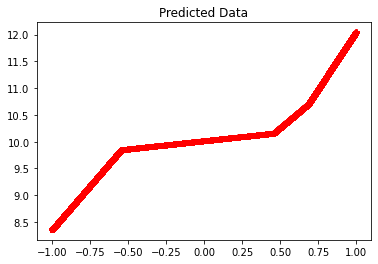

Mae : 0.039643203726207075
MSE : 0.0023774150266369374
RMSE : 0.04875874307892829
R2 : 0.9958755358581559


In [28]:
#Q6: CASE 2

model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(1, activation='relu'),
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 55.9413
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 16.1249
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 3.8873
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.9672
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.6095
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5934
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4251
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1888
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1370
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0650
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0235
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 13/20
750/750 [==

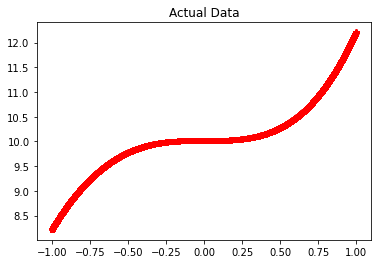

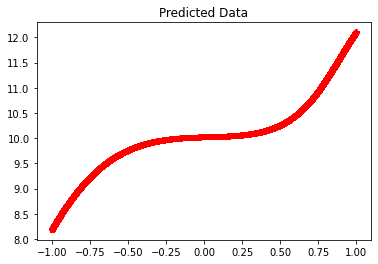

Mae : 0.015467318660522198
MSE : 0.00036435053203926496
RMSE : 0.019087968253307237
R2 : 0.9993679056085619


In [29]:
#Q6: CASE 3
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0222
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 12/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 13/20
750/750 [====

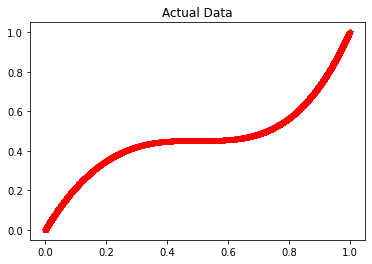

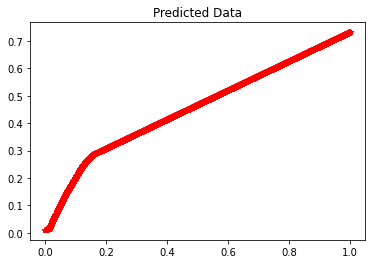

Mae : 0.053546226059854214
MSE : 0.004957833018194075
RMSE : 0.07041188122890962
R2 : 0.867362037994108


In [31]:
#Q6: CASE 4
xTrain = train['X']
yTrain = train['Y']
xTest = test['X']
yTest = test['Y']
xVldtn = validtn['X']
yVldtn = validtn['Y']

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0102
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0045
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 8.8175e-04
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 7.4694e-04
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 6.5561e-04
Epoch 13/20
7

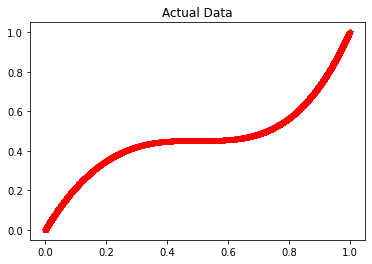

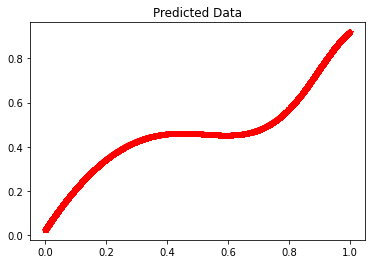

Mae : 0.009192229812014303
MSE : 0.00018027039900982416
RMSE : 0.01342648125942997
R2 : 0.9951771876449035


In [33]:
#Q6: CASE 5
xTrain = train['X']
yTrain = train['Y']
xTest = test['X']
yTest = test['Y']
xVldtn = validtn['X']
yVldtn = validtn['Y']

model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='tanh')
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


In [50]:
X = np.linspace(-1, 1, 30000)
Y = 0.2 * X ** 4 + 2 * X ** 3 +0.1 ** 2 + 10

d = { 'X': X, 'Y': Y}
df = pd.DataFrame(data=d)

#data split - unshuffled
training, testing, validation = Data_Split(0.3, 0.2, 0.5, df)

#scaling - unshuffled
train, test, validtn = Scale_Data(training, validation, testing)

Epoch 1/20
750/750 [==============================] - 3s 2ms/step - loss: 34.7029
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 1.3856
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.9927
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6501
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4124
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2562
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1103
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0145
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0068
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 13/20
750/750 [===

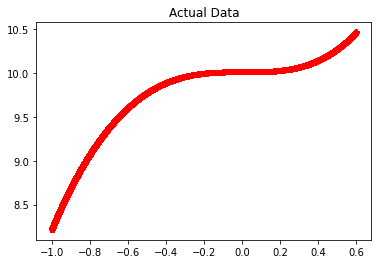

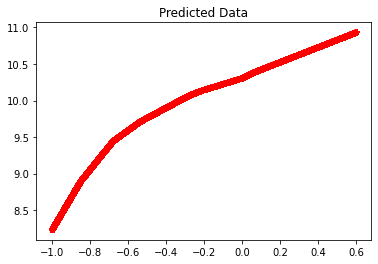

Mae : 0.230589357099311
MSE : 0.1057284831486529
RMSE : 0.32515916586904464
R2 : 0.574519450472192


In [53]:
#Q6: CASE 1 - unshuffled
xTrain = training['X']
yTrain = training['Y']
xTest = testing['X']
yTest = testing['Y']
xVldtn = validation['X']
yVldtn = validation['Y']

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='linear')
                          ])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 31.6465
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 2.1140
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 1.6860
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 1.1761
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.6295
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2073
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0368
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 9/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0040
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 12/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0027
Epoch 13/20
750/750 [===

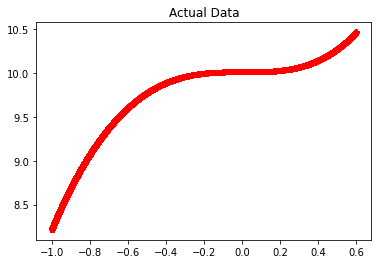

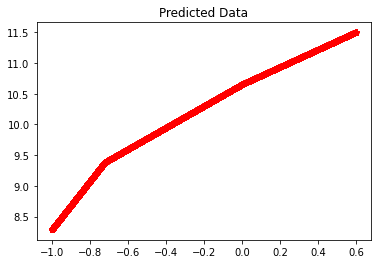

Mae : 0.4441436467161725
MSE : 0.37971008759883407
RMSE : 0.6162062054205832
R2 : -0.5280580210883552


In [55]:
#Q6: CASE 2 - unshuffled

model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(1, activation='relu'),
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0235
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 5.1610e-05
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 2.6933e-05
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 2.3239e-05
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 2.0855e-05
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 1.7854e-05
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 1.4491e-05
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 1.0409e-05
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 6.2707e-06
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 3.8991e-06
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 3.6902e-06
Epoch 12/20
750/750 [==============================] - 1s 2ms/step 

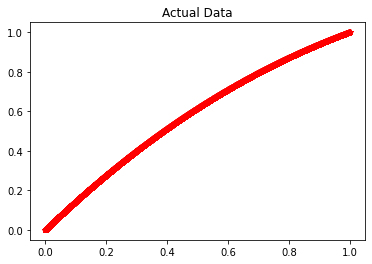

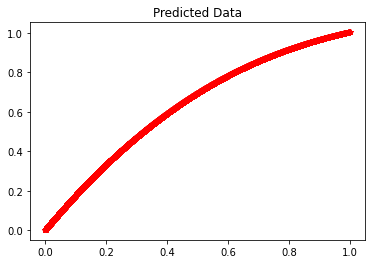

Mae : 0.05297685449226954
MSE : 0.003359014862579091
RMSE : 0.05795700874423292
R2 : 0.9597780045871123


In [60]:
#Q6: CASE 3 - unshuffled
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0274
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 4.7357e-04
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 4.2975e-05
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 2.9582e-05
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 2.2679e-05
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 2.0219e-05
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 2.0405e-05
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 1.9168e-05
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 2.1987e-05
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 

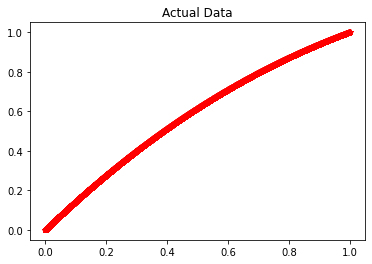

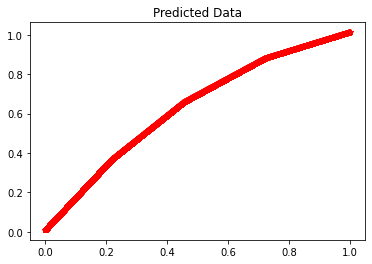

Mae : 0.05405750895211978
MSE : 0.0034410968890579018
RMSE : 0.05866086335077163
R2 : 0.9587951262648722


In [57]:
#Q6: CASE 4 - unshuffled
xTrain = train['X']
yTrain = train['Y']
xTest = test['X']
yTest = test['Y']
xVldtn = validtn['X']
yVldtn = validtn['Y']

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,1)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0641
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0018
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 7.7449e-04
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 3.3693e-04
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 1.6780e-04
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 9.4002e-05
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 6.6268e-05
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 5.0428e-05
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 3.8885e-05
Epoch 11/20
750/750 [==============================] - 1s 2ms/step - loss: 3.0573e-05
Epoch 12/20
750/750 [==============================] - 1s 2ms/step - loss: 

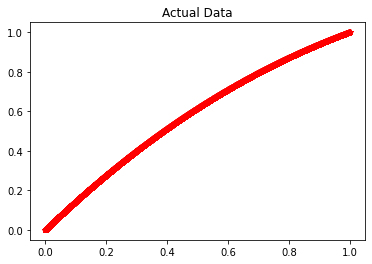

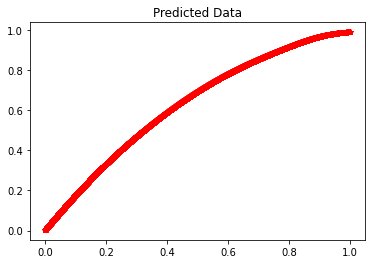

Mae : 0.051373007790999604
MSE : 0.0031643384962858423
RMSE : 0.05625245324682153
R2 : 0.962109126130895


In [58]:
#Q6: CASE 5 - unshuffled
xTrain = train['X']
yTrain = train['Y']
xTest = test['X']
yTest = test['Y']
xVldtn = validtn['X']
yVldtn = validtn['Y']

model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,1)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='tanh')
])

model.compile(optimizer='adam', loss='MSE')

model.fit(xTrain, yTrain, epochs=20, batch_size=12)

test_loss = model.evaluate(xTest, yTest)
yPred = model.predict(xTest)
yPred = {'yPred': yPred.reshape(len(xTest), )}
yPred = pd.DataFrame(data=yPred)


plot.title('Actual Data')
plot.plot(xTest, yTest, 'r*')
plot.show()

plot.title('Predicted Data')
plot.plot(xTest, yPred, 'r*')
plot.show()

MAE, MSE, RMSE, R2 = errCalc(xTrain, yTest, yPred)
print(f"Mae : {MAE}")
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 : {R2}")


In [80]:
#Q6: XOR NN
print("Assumptions: Epochs = 2500, learning rate = 0.2, hidden layers =1, 4 neuronsd fully connected, and 1 output")

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

def sigm(x):
  return (1/(1+np.exp(-x)))

def sigmDeriv(x):
  return(x*(1-x))

epochs = 2500
LR = 0.2
iN = 2
hN = 4
oN = 1

inpWeights = np.array([[0.698, 0.689, 0.169, 0.821], [0.169, 0.161, 0.634, 0.292]])
hiddWeights = np.array([[0.945], [0.250], [0.435], [0.191]])

inpBias = np.random.uniform(size=(1, hN))
hiddBias = np.array([[0.28414861]])

for i in range(epochs):
  hiddLayerActivtn = sigm(np.dot(X, inpWeights) + inpBias)
  outpLayerActivtn = sigm(np.dot(hiddLayerActivtn, hiddWeights))

  error = Y - outpLayerActivtn
  outpLayerDeriv = sigmDeriv(outpLayerActivtn)
  hiddLayerDeriv = sigmDeriv(hiddLayerActivtn)
  outpLayerErr = error * outpLayerDeriv
  hiddLayerErr = np.dot(outpLayerErr, hiddWeights.T) * hiddLayerDeriv

  hiddWeights += np.dot(hiddLayerActivtn.T, outpLayerErr) * LR
  inpWeights += np.dot(X.T, hiddLayerErr) * LR
  hiddBias += np.sum(outpLayerErr, axis=0, keepdims=True) * LR
  inpBias += np.sum(hiddLayerErr, axis=0, keepdims=True) * LR

hiddLayerActivtn = sigm(np.dot(X, inpWeights) + inpBias)
outpLayerActivtn = sigm(np.dot(hiddLayerActivtn, hiddWeights) + hiddBias)
print("Predictions:", outpLayerActivtn)

print("if pred < 0.2 THEN assummption = 0, else pred = 1")

Assumptions: Epochs = 2500, learning rate = 0.2, hidden layers =1, 4 neuronsd fully connected, and 1 output
Predictions: [[0.07586555]
 [0.71693166]
 [0.72216769]
 [0.17364458]]
if pred < 0.2 THEN assummption = 0, else pred = 1
